In [2]:
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

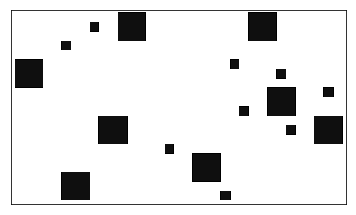

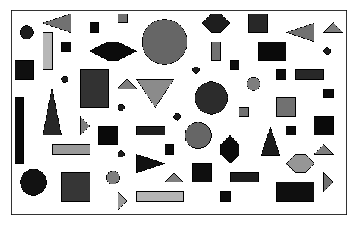

In [219]:
def show_grayscale(input_file):
    # read as gray and print it
    img = skimage.io.imread(input_file, as_grey=True)
    plt.imshow(img,  cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

show_grayscale(input_file = 'objetos1.png')
show_grayscale(input_file = 'objetos2.png')

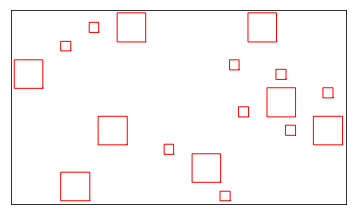

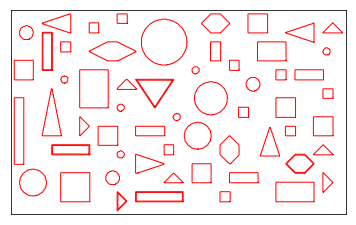

In [129]:
def show_contours(input_file):
    img = skimage.io.imread(input_file, as_grey=True)
    contours = measure.find_contours(img, level=0.5)

    # start with blank image
    img = np.full(img.shape, 255)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)

    # fill with the contour pixels in red
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], 'red', linewidth=1)

    # print image
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
show_contours(input_file = 'objetos1.png')
show_contours(input_file = 'objetos2.png')

(8422, 2)
img shape: (343, 563)
5.5 557.5
0 1


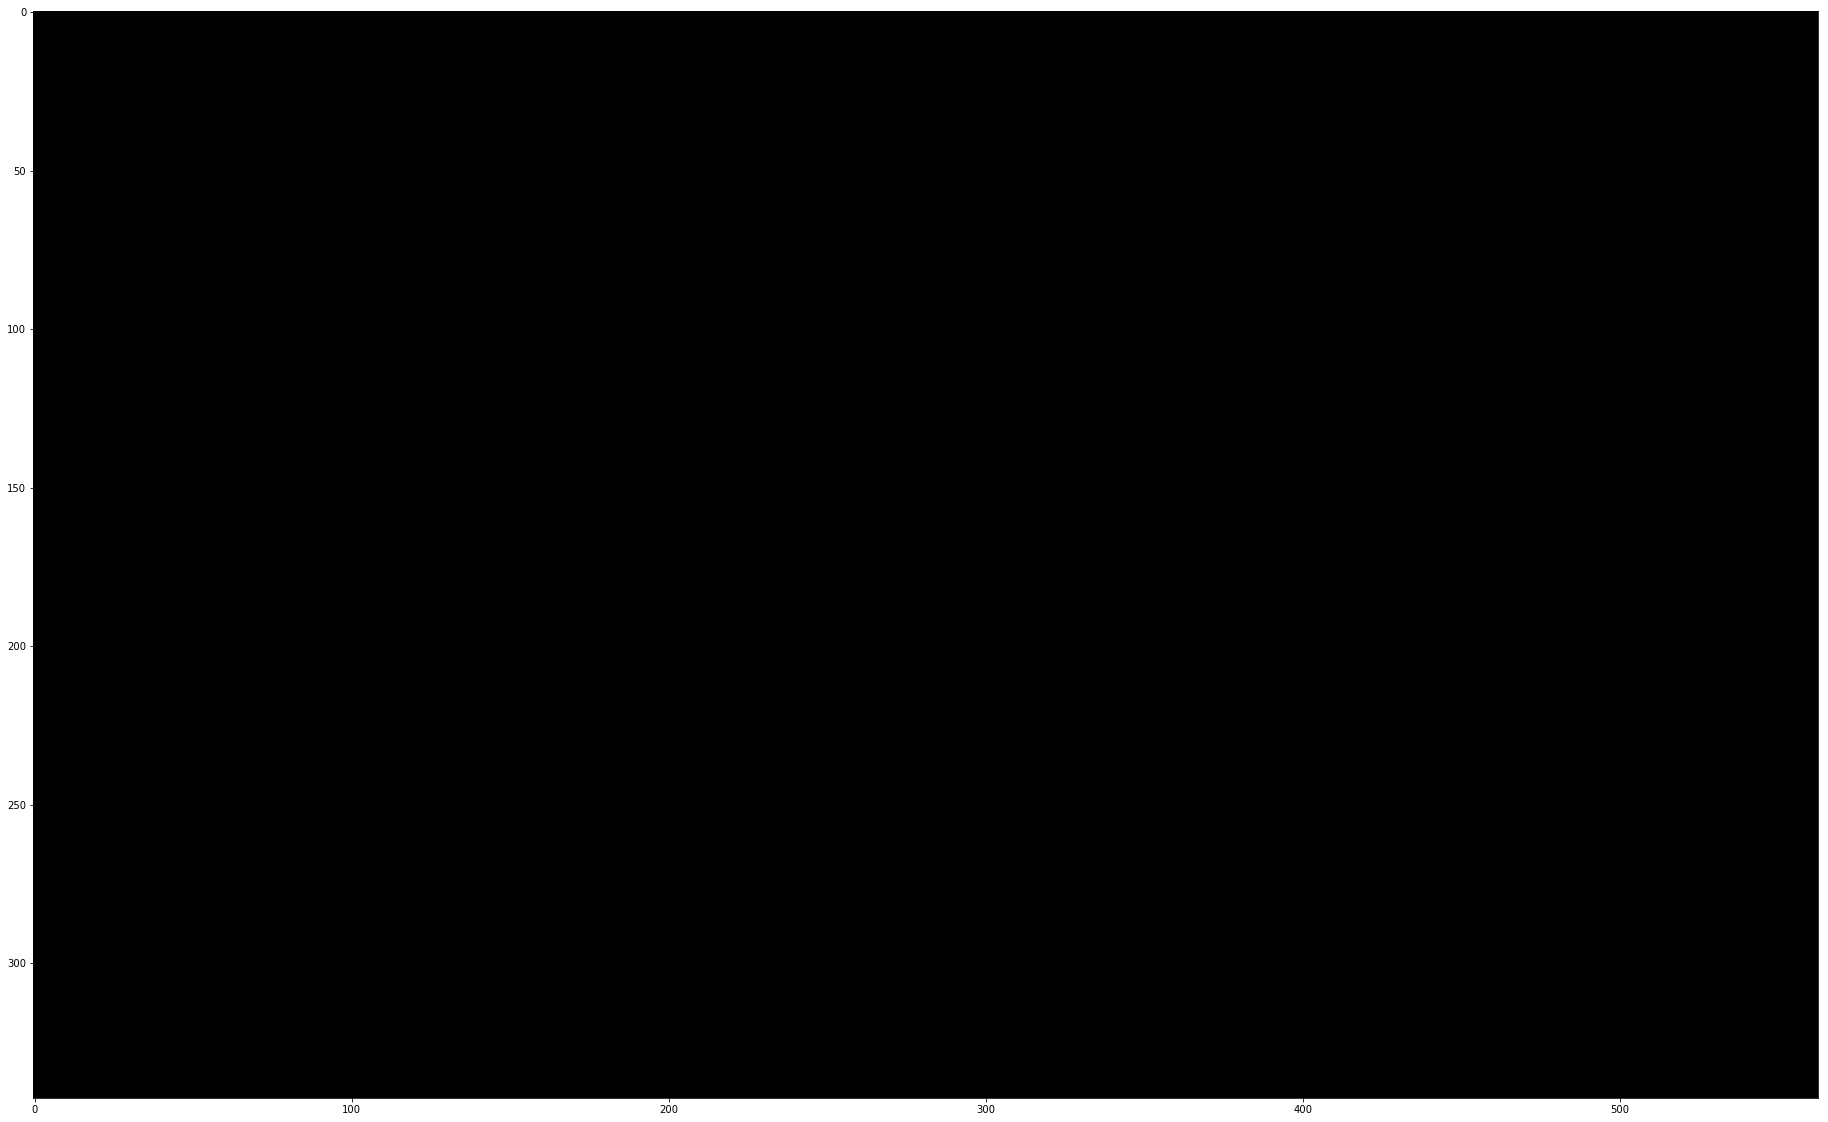

7593.81136265


In [196]:
# Extract image properties: perimeter, area and centroid

def get_perimeter(input_file):
    plt.figure(figsize=(40,20))
    
    original_img = skimage.io.imread(input_file, as_grey=True)

    # start with blank image
    img = np.full(original_img.shape, 0)
    #plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    
    contours = measure.find_contours(original_img, level=0.5)
    
    out = np.concatenate(contours).reshape([-1,2])
    print(out.shape)
    print('img shape:', img.shape)
    print(out.min(), out.max())
    
    for n, contour in enumerate(contours):
        contour = contour.astype(np.int)
        img[contour[:,0], contour[:,1]] = 1
    
    #plt.hist(img.ravel().astype(int), 256, [0, 256])
    #plt.show()
    # turn to binary
#     img[img > 100] = 255
#     plt.imshow(img, cmap='gray')

    print(img.min(), img.max())
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    
    plt.show()
    print(measure.perimeter(img))

get_properties('objetos1.png')

(327, 563)
-------
2 190.0 (29.0, 202.5) 2352 2352
3 190.0 (29.0, 422.5) 2352 2352
4 62.0 (29.0, 139.5) 272 272
5 62.0 (60.5, 92.0) 272 272
6 188.0 (107.5, 29.5) 2304 2304
7 62.0 (92.0, 375.5) 272 272
8 64.0 (108.0, 454.0) 289 289
9 190.0 (155.0, 454.5) 2352 2352
10 64.0 (139.0, 533.0) 289 289
11 64.0 (171.0, 391.0) 289 289
12 190.0 (202.5, 171.0) 2352 2352
13 190.0 (202.5, 533.0) 2352 2352
14 64.0 (202.0, 470.0) 289 289
15 62.0 (234.0, 265.5) 272 272
16 188.0 (265.5, 328.5) 2304 2304
17 190.0 (296.5, 108.0) 2352 2352
18 62.0 (312.5, 360.0) 272 272


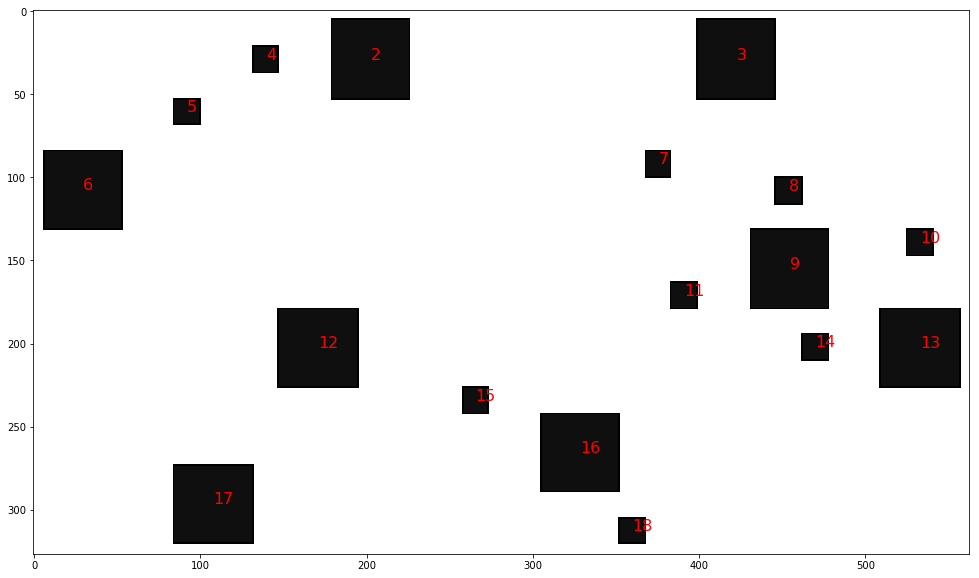

/Users/tanakaed/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:2105: RuntimeWarning: invalid value encountered in double_scalars
  left = [left[i] - width[i] / 2. for i in xrange(len(left))]


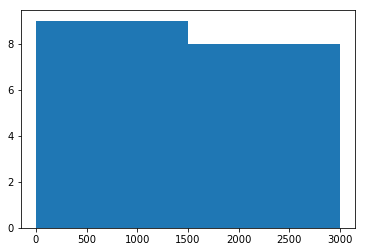

In [40]:

def get_props(input_file):
    plt.figure(figsize=(20,10))    
    img = skimage.io.imread(input_file, as_grey=True)    
    plt.imshow(img, cmap='gray')
    
    print(img.shape)
    print('-------')
    props = measure.regionprops(measure.label(img, background=255))
    
    areas = []
    
    # label 1 is the background
    for prop in props[1:]:        
        print(prop.label, prop.perimeter, prop.centroid, prop.area, prop.convex_area)
        plt.text(prop.centroid[1],prop.centroid[0], str(prop.label), fontsize=16, color='red')
        areas.append(prop.area)
        

    # show labeled regions
    plt.show()
    plt.clf()
    
    # show histogram of areas
    plt.hist(areas, bins=[0, 1500, 3000, np.inf])
    plt.show()
    
get_props('objetos1.png')
# get_props('objetos2.png')